In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image

### Import Data

In [4]:
# loading the data

df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',',header=None)

In [5]:
# Removing duplicate values and reindexing

df.drop_duplicates(subset =[" pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))


## Embedding 2

In [19]:
# Take the first picture as an example
pixel_values = [int(numeric_string) for numeric_string in df[" pixels"][300].split(' ')]

image_dummy = np.empty((48*48,3), int)
for i in range(0,len(points_dummy)):
    image_dummy[i] = [(i-i%48)/48, i%48, pixel_values[i]]

image_stacked = np.vstack(image_dummy)
image = sr.EucObject(image_stacked)

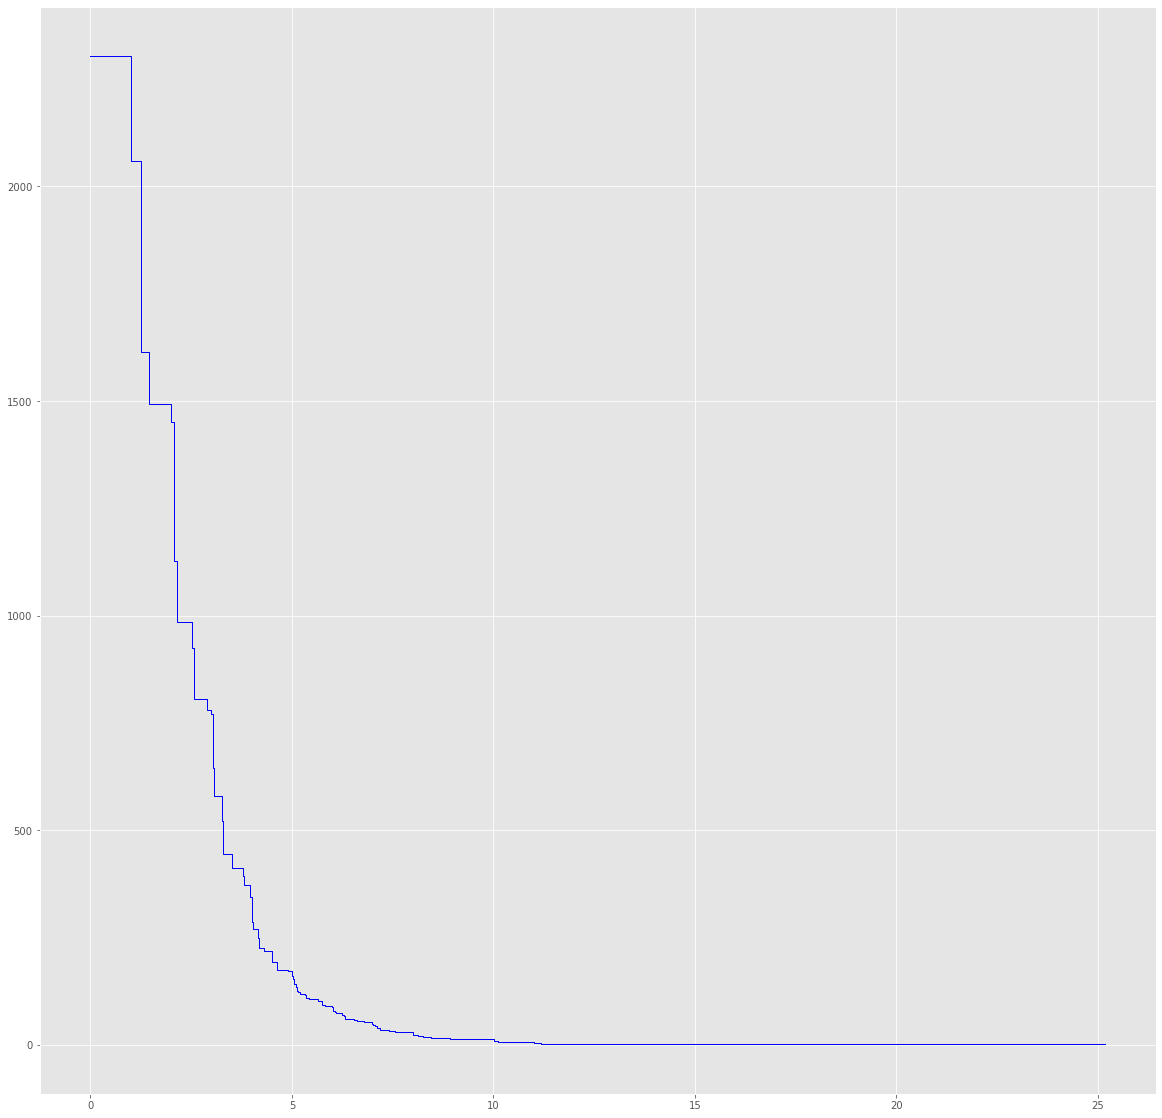

In [20]:
# specifying metric
metric = "minkowski"
metric_parameter = 3

# specifying clustering method
clustering_method = "complete"


f1 = image.get_h0sr(metric = metric, metric_parameter = metric_parameter)


plt.figure(figsize=(20,20))

f1.plot(color ="blue")

#### Homology

In [ ]:
metrics = ["euclidean"]


D ={}
for m in metrics:
    D[m] = image.get_distance(metric = m)

maxdim = 3
coeff = 2
for m in metrics:
    bc = D[m].get_bc(maxdim = maxdim, coeff = coeff)
    fig=plt.figure(m, figsize = (20,10))
    fig.suptitle(m, fontsize=16)
    ax=plt.subplot(1,2,1)
    ax.set_title("H0")
    bc["H0"].plot()
    ax=plt.subplot(1,2,2)
    ax.set_title("H1")
    bc["H1"].plot()